# Fitting A First Model

## Numpy polyfit function
In this unit, we will go through a concrete example and learn how to fit polynomials using the Numpy polyfit() function. At the end of this unit, you will have to solve a small task using what you’ve learned.

### The task
Let’s start by loading the first dataset.

In [1]:
import pandas as pd

data_df = pd.read_csv("Ressources/c3_poly_data-1.csv")
data_df.head()

,x,y
0,0.375,-0.027
1,0.951,0.378
2,0.732,0.174
3,0.599,0.049
4,0.156,-0.423


As you can see, the Dataframe contains an x and a y variable. In this unit, we will learn how to use the polyfit() function from Numpy’s polynomial package to model the relationship between these two variables.

Let’s take a look at its [documentation page ] (https://numpy.org/devdocs/reference/generated/numpy.polynomial.polynomial.polyfit.html#numpy.polynomial.polynomial.polyfit). It states that the function computes the “Least squares polynomial fit”.

**Note :** “Least-squares fit of a polynomial to data. Return the coefficients of a polynomial of degree deg that is the least squares fit to the data values y given at points x. […] The fitted polynomial(s) are in the form
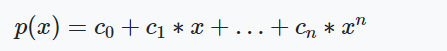
where n is deg. - Numpy documentation


In summary, this function **fits a curve** to a set of data points using the equation of a **polynomial** of degree deg. You’ve probably already used similar tools. For instance, the Microsoft Excel software can also perform curve fitting. Here, the word “polynomial” refers to a set of curves that you can fit, and “least squares” refers to how these curves fit the data points. But we will learn more about that in the next units.

Let’s do a quick refresher about polynomials.

### Polynomials
When the polyfit() function documentation states that it fits a **polynomial** to a set of x/y points, it means that it tries to model the relationship between these two variables with a polynomial equation.

The most common polynomial equations are the equation of a line with slope a and an intercept term b:
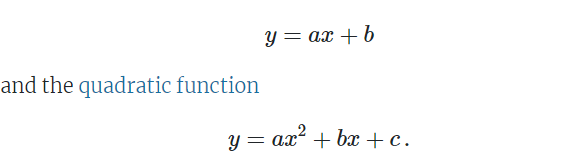

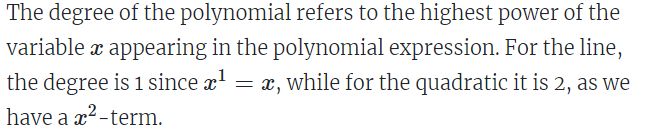

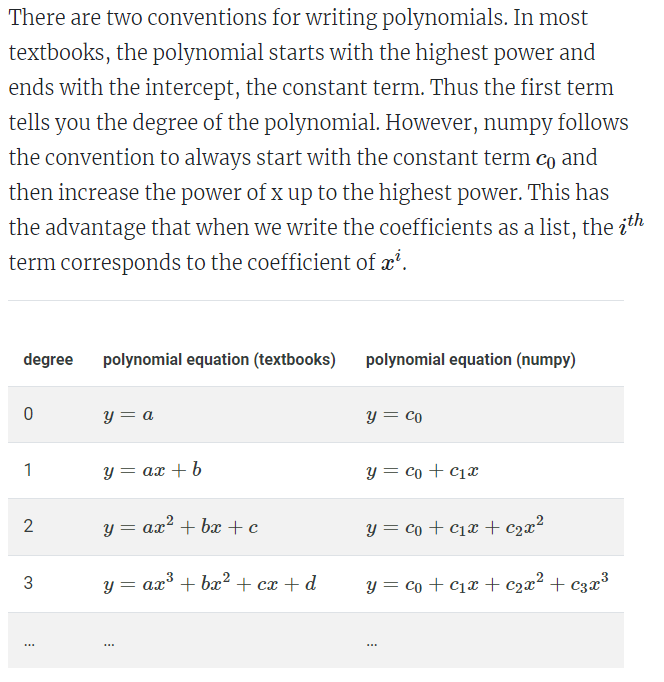


When fitting a polynomial using the polyfit() function, we need to specify the degree of the polynomial. This degree determines what kind of relationship we can model, and each individual choice of degree leads to a different model for this data. A polynomial with a higher degree can model more complex relationships than a polynomial with a lower degree. We can think about the degree as a model parameter that captures this complexity.

Let’s experiment with polynomials and test the polyfit() function with the x/y values from our data-1.csv dataset that we loaded above.

### First dataset
In the previous courses, we mainly worked with Pandas DataFrame objects. This was particularly convenient since each column in our data can have a different data type.

However, when mapping some input values to an output, machine learning algorithms usually expect values from the data to have a uniform data type. Hence, they mainly work with Numpy arrays. So, before fitting our model, the first step of our ML pipeline is to prepare the x and y Numpy array variables




In [2]:
x = data_df.x.values
y = data_df.y.values

print("Type of x and y:", type(x), type(y))

Type of x and y: <class 'numpy.ndarray'> <class 'numpy.ndarray'>


Let’s now plot this x/y data using a scatter plot. Here is the code to do it with Matplotlib.



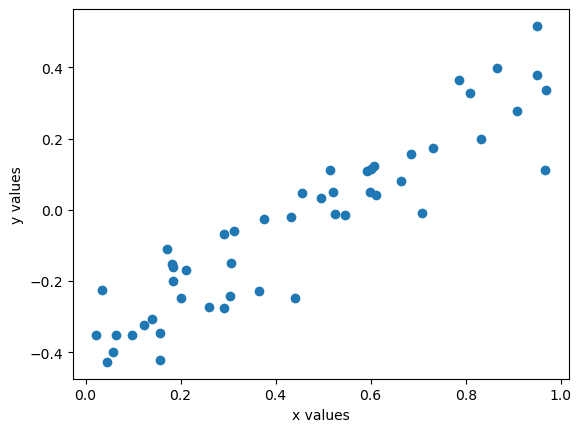

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot data points
plt.scatter(x, y)
plt.xlabel("x values")
plt.ylabel("y values")
plt.show()

In this course and the next one, we will focus on the machine learning aspect of each task and just use Matplotlib for plotting. However, feel free to use other libraries to plot your data ex. Seaborn

As you can see, the data points follow a **linear trend**. Hence, it makes sense to fit a line and set the degree of the Numpy polyfit() function to one.

In [4]:
import numpy as np
import numpy.polynomial.polynomial as poly

coefs = poly.polyfit(x, y, deg=1)
print("Coefficients:", coefs)

Coefficients: [-0.3904125   0.77788056]


In the code from above, we pass the x/y arrays to the function and use the deg attribute to set the degree of the polynomial. The function returns the set of coefficients that characterize the polynomial. In our case, the coefs array contains the intercept term c_0 and the slope c_1 of the line defined by the equation y=c_0 + c_1x.

Of course, we can also extract the coefficients as separate variables.

In [5]:
# Extract individual coefficients
c_0, c_1 = coefs

print("c_0 (intercept):", c_0)
print("c_1 (slope)    :", c_1)

c_0 (intercept): -0.3904124988780681
c_1 (slope)    : 0.7778805590197081


For me : b, a = poly.polyfit(x,y, deg=1)

### Plotting our model
In our simple scenario, we have a single input x, and a single output y. Thus we can actually visualize our model by plotting some predictions. In this case, the equation of our model is just the equation of a straight line since deg=1. For the purpose of plotting, we first generate a few evenly spaced artificial x_values and then compute their associate y_values using the linear equation.



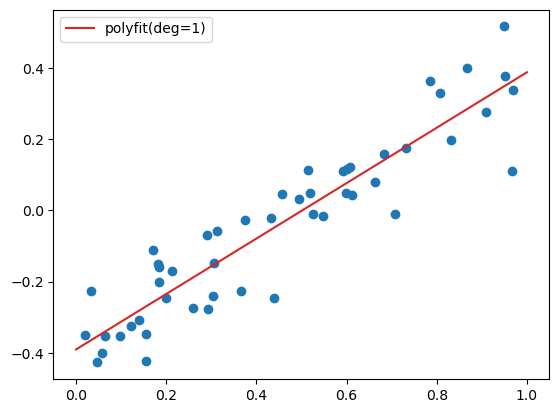

In [6]:
# Generate a hundred values between 0 and 1
x_values = np.linspace(0, 1, num=100)  # ~ [0, 0.01, 0.02, ... 0.98, 0.99, 1]

# Compute the associate y values
y_values = c_0 + c_1 * x_values

# Plot the line
plt.scatter(x, y)  # Plot the actual data
plt.plot(x_values, y_values, c="C3", label="polyfit(deg=1)")  # Plot the prediction line
plt.legend()
plt.show()

As you can see, our model fits well to the data points.

In the code from above…

### Second dataset
We are now going to work on the second set of points which has a more complex relationship between the x/y variables. Again, let’s use Pandas to read the .csv file and load the variables into two Numpy arrays.

In [12]:
# Load second set of points
data_df = pd.read_csv("Ressources/c3_poly_data-2.csv")
x2 = data_df.x.values
y2 = data_df.y.values
data_df.head()

,x,y
0,0.551,-0.493
1,0.708,-1.142
2,0.291,0.705
3,0.511,-0.059
4,0.893,-1.298


Again, we should start by visualizing the data points with a scatter plot. This time, it’s your turn to write the code! You should get the following result.



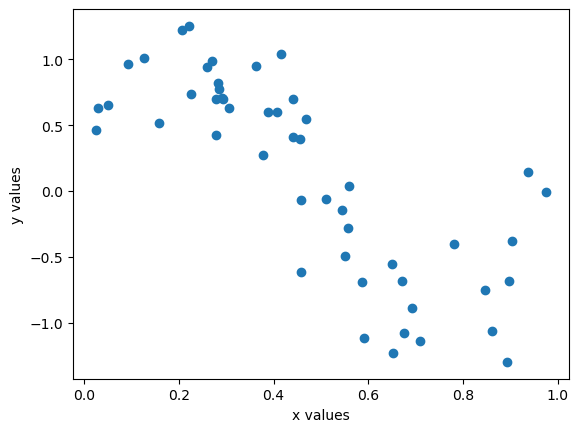

In [13]:
# Plot data points
plt.scatter(x2, y2)
plt.xlabel("x values")
plt.ylabel("y values")
plt.show()

Let’s try to fit a line using the code that we have seen above.

In [14]:
# Fit a line
coefs2 = poly.polyfit(x2, y2, deg=1)
print('Coefficients:', coefs2)

# Generate a hundred x values between 0 and 1
x_values2 = np.linspace(0, 1, num=100)

# Compute the associate y values
c_0, c_1 = coefs2
y_values2 = c_0 + c_1*x_values2

Coefficients: [ 1.17807746 -2.25363975]


You should get the following line with a negative slope of -2.25363975.

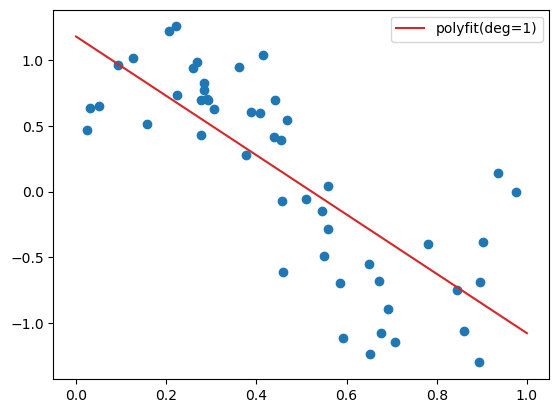

In [15]:
# Plot the line
plt.scatter(x2, y2)  # Plot the actual data
plt.plot(x_values2, y_values2, c="C3", label="polyfit(deg=1)")  # Plot the prediction line
plt.legend()
plt.show()

Our line captures the main trend but is too rigid to model the relationship between the x and y values well. Let’s increase the degree and fit a polynomial of degree 3.



In [16]:
# Fit a polynomial of degree 3
coefs2 = poly.polyfit(x2, y2, deg=3)
print("Coefficients:", coefs2)

Coefficients: [  0.24324604   8.92987847 -29.43676159  20.52793415]


This time, the polyfit() function returns the four coefficients that correspond to the equation

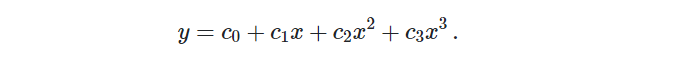

Again, we can extract the coefficients and visualize our model by computing the y_values using the formula of our polynomial.


In [17]:
c_0, c_1, c_2, c_3 = coefs2
y_values2 = c_0 + c_1 * x_values2 + c_2 * (x_values2 ** 2) + c_3 * (x_values2 ** 3)

As you can see, the equation is a bit longer, and it can get complicated to compute the y values manually. For this reason, Numpy provides a polyval() function that takes the x values and the array of coefficients.

In [18]:
# Predict y values with new coefs
y_values2 = poly.polyval(x_values2, coefs2)

You can now plot the curve using these x_values2 and y_values2 arrays.

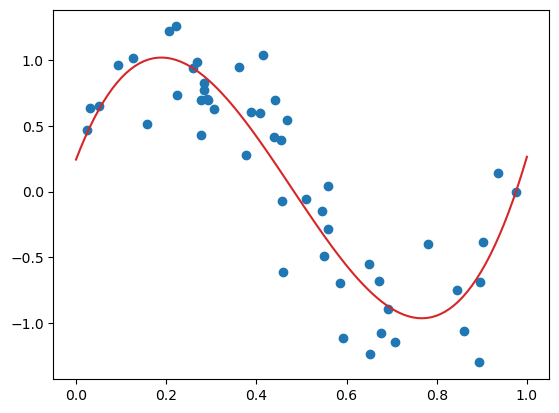

In [20]:
# Plot the line
plt.scatter(x2, y2)  # Plot the actual data
plt.plot(x_values2, y_values2, c="C3")  # Plot the prediction line
plt.show()

As you can see, a polynomial of degree 3 is better at capturing the trend in this dataset than a line. Try to increase the degree to 4, 5 or even more! You should see that the curve starts fitting more than just the trend. It gets influenced by the noise in the data. This phenomenon is known as **overfitting**, but we will learn more about it later in this course.

- polyfit() calculates the coefficients of the polynomial that best fits our data x to our target y.
- polyval() takes x values and the coefficients to calculate y values using the fitted polynomial. These y values serve as predictions.
- polyfit() has a parameter deg that allows us to fix the **complexity** of our model.

### Summary
We now know how to fit a curve to a set of data points using the equation of polynomials and the Numpy polyfit() function. However, there are still many things to learn about this process. For instance,

- How does the function find the coefficients?
- What does it mean to compute the “least squares solution”?

To answer these questions, we need to learn more about machine learning models and the learning process. In the next units, we will start with the linear regression model.

### Small task: third dataset
Before going to the next units, you should load and plot the third dataset and then try to fit a polynomial to this data.




In [48]:
# Load second set of points
data_df = pd.read_csv("Ressources/c3_poly_data-3.csv")
x3 = data_df.x.values
y3 = data_df.y.values
data_df.head()

,x,y
0,5.386,9.290
1,40.745,8.351
2,7.852,9.080
3,19.981,8.707
4,3.326,9.378


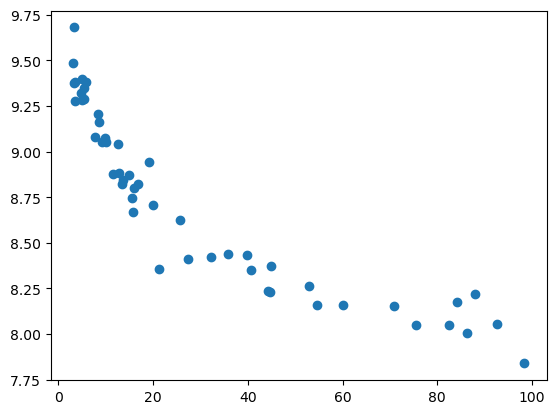

In [49]:
# Plot the line
plt.scatter(x3, y3)  # Plot the actual data
plt.show()

## Solution - polyfit with the third set of points

Let’s see how to solve the small task from the last unit. Again, feel free to play with the code from this unit as you go through the text.

### Solution: third dataset

As we can see, the points follow a logarithmic curve that decreases. The larger x is, the slower y values decrease. For instance, we can see that y values decrease from 9.75 to 8.25 (-1.5) when x is between 0 and 50, but then decrease from 8.25 to 8 (-0.25) when x is between 50 and 100.

So, **is it possible to model this set of data points with a polynomial?** Before answering the question, let’s take a look at the following theorem

**Note :**
It’s possible to approximate any continuous function on a closed interval to an arbitrary precision with a polynomial by increasing its degree -

`Weierstrass theorem`

In our case, we want to approximate the **logarithm function** (which is a continuous one i.e. it doesn’t jump and we can draw the line without lifting the pencil) between 1 and 100 (a closed interval).

So, the answer seems to be yes - we should be able to model this data using the polyfit() function from Numpy if we pass a sufficiently high value for its degree deg parameter.

However, if we do the experiment, we can see that the resulting model curve doesn’t look like a logarithmic one. Increasing the degree simply makes the curve bumpier.

Below, we simply collected the code from the previous unit in a single function that takes the x/y values and the degree deg and plot the model with the labels and a legend.

In [26]:
import numpy as np
import numpy.polynomial.polynomial as poly


def fit(x, y, deg, xlabel, ylabel, legend):
    # Fit a polynomial
    coefs = poly.polyfit(x, y, deg=deg)

    # Generate a hundred values between min(x) and max(x)
    x_values = np.linspace(min(x), max(x), num=100)

    # Predict y values
    y_values = poly.polyval(x_values, coefs)

    # Plot curve
    plt.scatter(x, y)
    plt.plot(x_values, y_values, c="C3", label=legend)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

And here is the result for deg=15

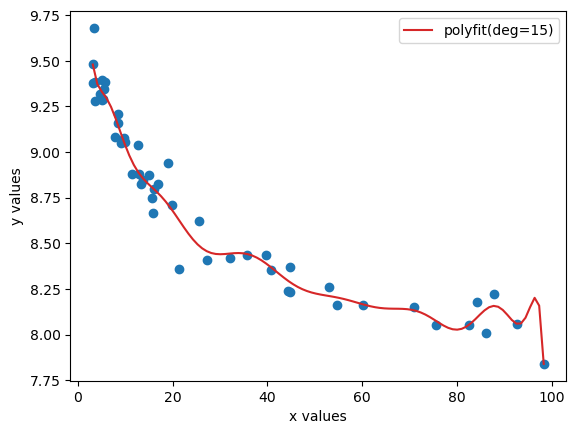

In [27]:
fit(x3, y3, 15, "x values", "y values", "polyfit(deg=15)")

So, why does increasing the degree not improve the results in this example?

It’s important to understand that the data that we try to model is not perfect. Our data does not represent points from an actual logarithm function. **There is some additional noise in the data** which cause the points to deviate slightly from the logarithm function. Our high-degree polynomial tries to incorporate this additional noise, too. This phenomenon is known as **overfitting**, and you will learn more about it in this course.

To avoid overfitting, we should use a lower degree. For instance, we can try with a polynomial of degree 2.

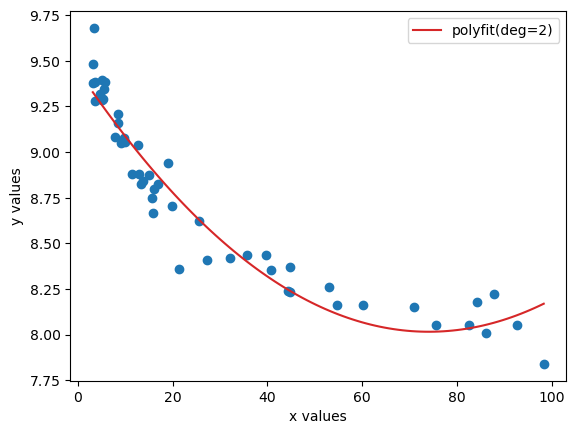

In [28]:
fit(x3, y3, 2, "x values", "y values", "polyfit(deg=2)")


A polynomial of degree 2 captures well the main trend, but it starts increasing around x=80 which doesn’t look correct. Intuitively, we would expect the points to continue decreasing after x=100 to a value around y=7.75.

C:\Users\s1114237\Anaconda3\envs\adsml\lib\site-packages\numpy\polynomial\polynomial.py:1350: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


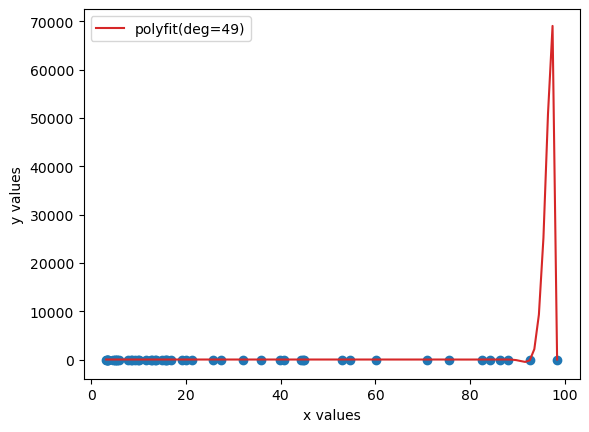

In [33]:
fit(x3, y3, 49, "x values", "y values", "polyfit(deg=49)")

We will see later in this course why `polyfit()` returns `RankWarning` messages when discussing **ill-conditioning**. But in short, this is a numerical issue that happens when slight changes in the data creates large variations in the model output. Usually, we solve this numerical instability by simply adding **regularization**, but more about this later.

It's also interesting to note that the curve can pass through the 50 data points if we set `deg=49`. To understand why, take the examples of a line (`deg=1`) and the quadratic curve from above (`deg=2`). How many data points can they perfectly model? The line can go through any pair of points while the quadratic curve can model any set of three points. In general, a model with `p` parameters (ex. the `a, b` coefficients in the case of a line) can perfectly fit `p` data points. So, when the number of model parameters `p` is larger or equal to the number of data points `n`, overfitting is very likely. This is sometimes referred to as the `p >> n` problem where `>>` means "is much greater"

### Applying the logarithm transformation
To solve the task, we need to use the idea of **feature transformation**. We know that a polynomial equation of degree 1 can only model linear relationships.

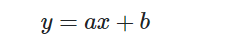

However, if we apply the logarithm function to the x values before passing them to the `polyfit()` function, the formula becomes

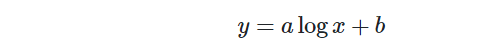


Hence, it can also model a logarithmic relationship between the 
x  and y variables.

You can think about this transformation as simply fitting a line (deg=1) to the data points from above after applying the logarithm function to the x-axis. We can see this by calling the fit() function from above with log(x3) instead of x3

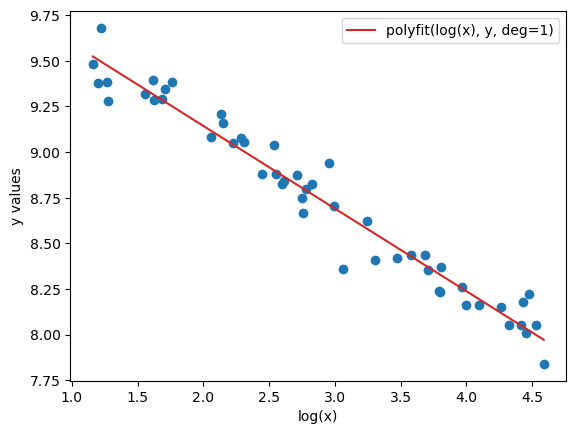

In [34]:
fit(np.log(x3), y3, 1, "log(x)", "y values", "polyfit(log(x), y, deg=1)")


As we can see, the **transformed data** now follows a linear trend, and we can fit a line with `polyfit(deg=1)`

If we want to plot the model from above with the original scale, we can run

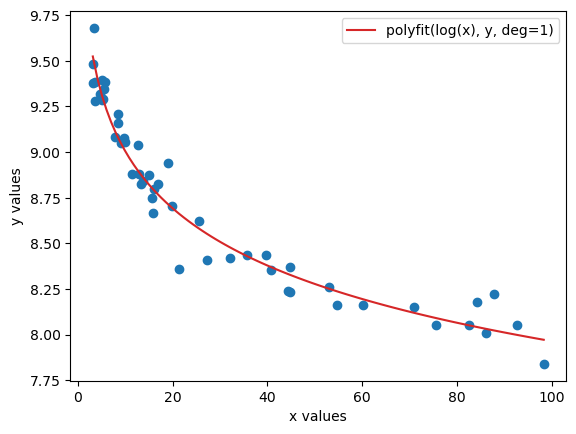

In [56]:
# Fit a polynomial
coefs = np.polyfit(np.log(x3), y3, deg=1)

# Generate a hundred values between min(x) and max(x)
x_values = np.linspace(x3.min(), x3.max(), num=100)

# Predict y values
y_values = np.polyval(coefs, np.log(x_values))

# Plot curve
plt.scatter(x3, y3)
plt.plot(x_values, y_values, c='C3', label='polyfit(log(x), y, deg=1)')
plt.xlabel('x values')
plt.ylabel('y values')
plt.legend()
plt.show()

As we can see, the curve now fits the data points better.

### Summary
We now know what a **polynomial fit** is and how to create one for a set of x/y data points using the `polyfit()` function. Also, we saw the basic idea behind **feature transformation** with the logarithm transformation example.

In the next units, we will learn about the machine learning jargon and notation, and we will see in greater detail the **simple linear regression model** which is the one that the polyfit() function uses when you set its degree to one.

## ML vocabulary and notation
We will now learn about the jargon and mathematical notation that you will see online when reading about machine learning. At the end of this unit, you should understand the basic vocabulary to describe datasets. For instance

- What is the dimensionality and the cardinality of a dataset?
- What are feature and target variables? What is an input matrix or an output vector?
- What are explanatory and independent variables?

To illustrate these concepts, we are going to work on the synthetic **marketing campaign** dataset which is inspired by the Advertising dataset from the ISL book - An Introduction to Statistical Learning, from James, G., Witten, D., Hastie, T., Tibshirani, R. - If you want to take a look at the book, you can find a free PDF version online on the book website.

### Scenario
In this imaginary scenario, our task is to provide advice to a company to organize a marketing campaign and increase the sales of a particular product. The company may invest in different advertising media: television, web, and radio. To achieve this, we will use data from previous marketing campaigns collected by the company.

In this unit and the next ones, our goal is to fit a linear regression model to the data and predict sales given the budgets of each advertising media.

**Important note**: In this course, we will focus on the **prediction** aspect of the linear regression model i.e make accurate predictions. But if you want to go further and also learn about the **interpretation** aspect of this model, i.e. draw conclusion from data, we recommend you to read chapter 3 of the ISL book. However, note that the interpretation aspect of linear regressions requires a good background in statistics.


In [57]:
import pandas as pd

data_df = pd.read_csv("Ressources/c3_marketing-campaign.csv")
data_df.head()

,tv,web,radio,sales
0,0.916,1.689,0.208,1.204
1,9.359,1.706,1.071,4.800
2,5.261,2.538,2.438,3.970
3,8.682,2.092,1.283,5.212
4,11.736,1.660,1.800,5.993


Each row is a previous marketing campaign and has four values. The first three are the corresponding budgets for each media in thousands of dollars, and the last one is the sales in thousands of units.

Let’s plot the data using a scatter plot for each marketing budget.

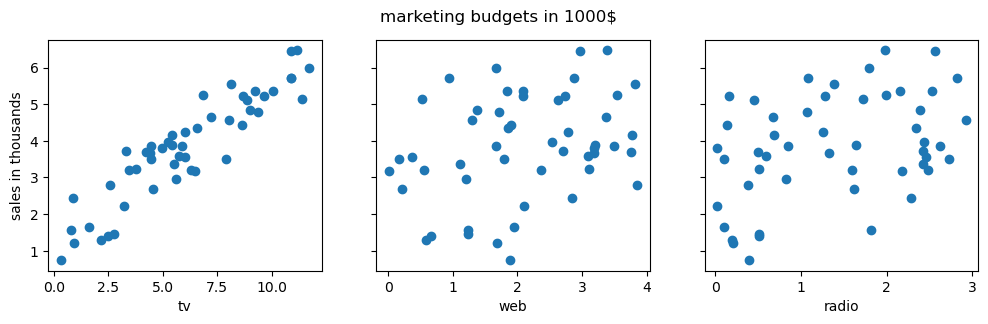

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt

# Create figure
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 3), sharey=True)
fig.suptitle("marketing budgets in 1000$")
ax1.scatter(data_df.tv, data_df.sales)
ax1.set_xlabel("tv")
ax1.set_ylabel("sales in thousands")
ax2.scatter(data_df.web, data_df.sales)
ax2.set_xlabel("web")
ax3.scatter(data_df.radio, data_df.sales)
ax3.set_xlabel("radio")
plt.show()

As we can see, there is a clear correlation between the television budget and the sales. However, before fitting models to this data, let’s learn about the basic jargon and notation to describe datasets.

### Machine learning jargon
The data_df DataFrame has four columns and 50 rows.

In [59]:
print("Shape of data_df:", data_df.shape)

Shape of data_df: (50, 4)


Each column corresponds to a variable and each row to an observation or measurement of these variables. We assign different names to them depending on their role in our machine learning task.

For instance, in our example, we want to predict the sales given the different budgets. Hence, the **sales** variable is called the **target or output variable**. On the other hand, we compute predictions based on the budget variables. Hence, the **tv, web and radio** budgets are the **features or input variables** in our problem.

Hopefully, we measured relevant features that **explain** well the target variable. For this reason, features are sometimes called the **explanatory variables**. On the other hand, we could say that the target variable **depends** on the set of input variables that we measured, so we sometimes call it the **dependent variable**.

Usually, we have a single target variable and many features. However, it’s also possible to have many output variables. For instance, in the next course, we will classify images of cars, bikes, trucks using neural networks. In this case, it makes sense to have a target for each category, and we end up with three target variables: is_a_car, is_a_bike and is_a_truck

Let’s summarize this new vocabulary with the data_df DataFrame

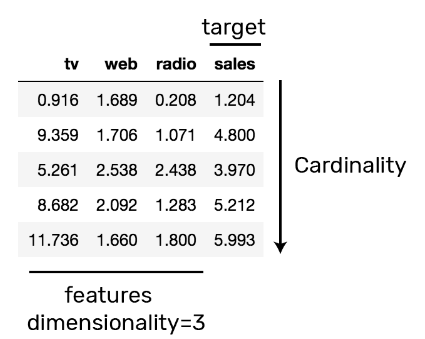

As you can see, the number of features is also referred to as the **dimensionality** of our dataset, and the number of rows as its **cardinality**.

### Feature matrix and target vector
In this course, we will always start by loading the features into a **feature matrix** X and the target values into an **output vector** y. We will need these two variables when applying machine learning algorithms.

In [60]:
X = data_df.drop("sales", axis=1).values
y = data_df.sales.values

In [61]:
print("Shape of X: {} dtype: {}".format(X.shape, X.dtype))

Shape of X: (50, 3) dtype: float64


In [62]:
print("Shape of y: {} dtype: {}".format(y.shape, y.dtype))

Shape of y: (50,) dtype: float64


As you can see, we extract the three features into a variable X by dropping the sales column, and we create a target vector y from it. We then convert them into Numpy arrays using the .values attribute.

Note that we cannot use the loc() and iloc() functions since X/y are not Pandas objects anymore. However, we can use the standard slicing notation from Numpy to get the data points



In [63]:
X[:5, :]


array([[ 0.916,  1.689,  0.208],
       [ 9.359,  1.706,  1.071],
       [ 5.261,  2.538,  2.438],
       [ 8.682,  2.092,  1.283],
       [11.736,  1.66 ,  1.8  ]])

In [64]:
y[:5]

array([1.204, 4.8  , 3.97 , 5.212, 5.993])

Let’s now learn about the basic mathematical notation that we will find in most machine learning resources to denote the input/output data.

### Mathematical notation
The mathematical notation is an essential part of the machine learning vocabulary. It allows expressing ideas in a very concise way. In this section, we will go through the important symbols to describe datasets.

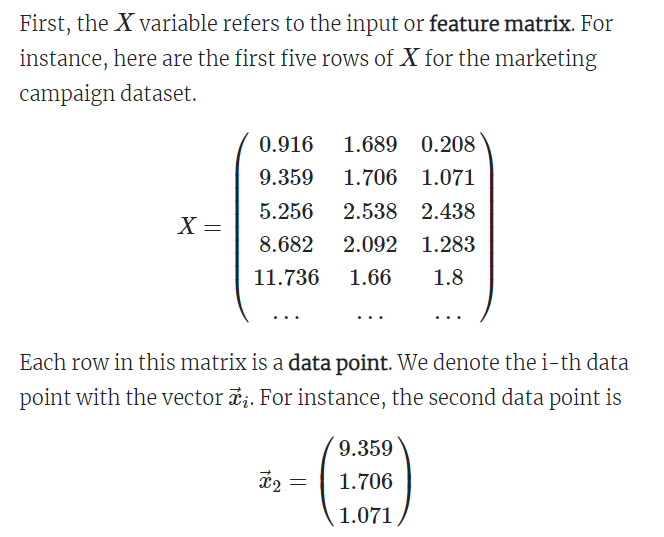

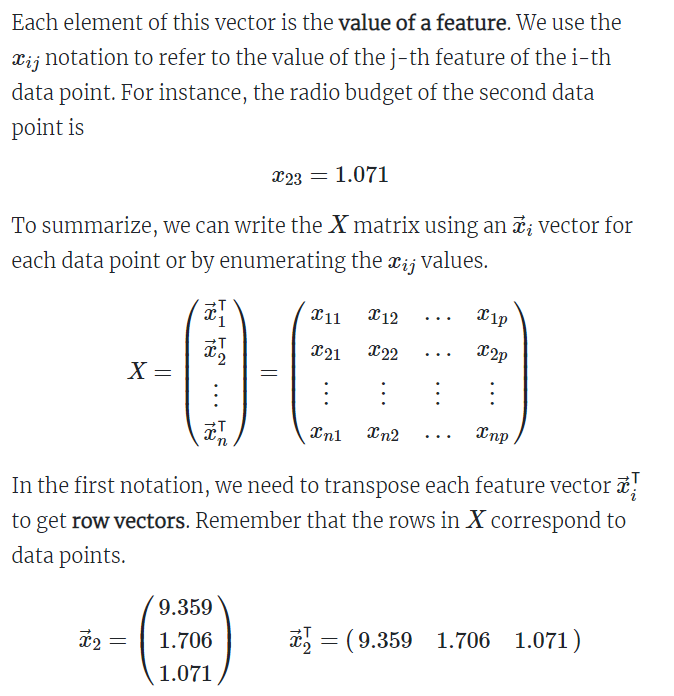

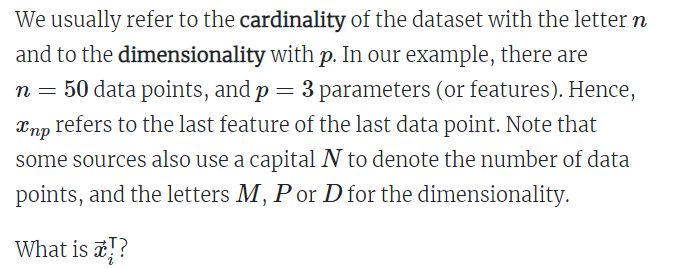

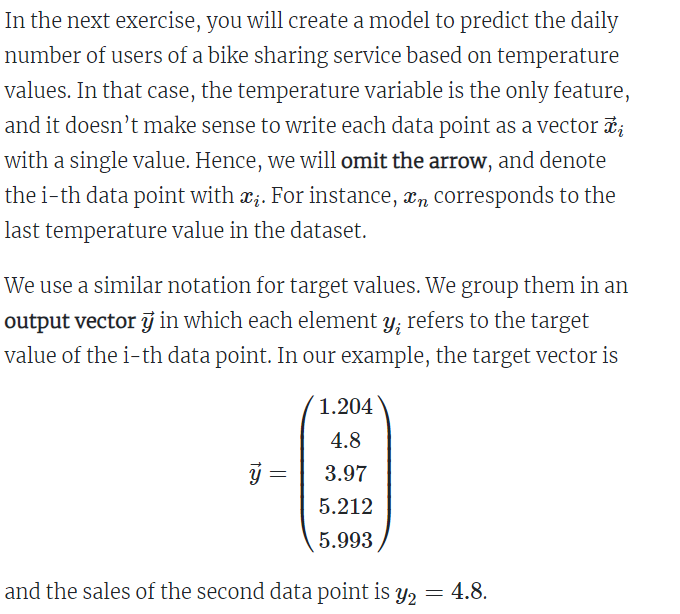

### Summary
In this unit, we saw the basic vocabulary and notation to describe machine learning datasets. In the next unit, we will do a small quiz using examples from ML articles, tutorials and documentation pages that you can find online.

**Note**
In machine learning the input X is known as the feature matrix. Its columns may be referred to as
- input variables,
- features,
- explanatory variables, or
- independent variables.

The column vector of y is known as the
- output,
- target, or
- dependent variable

The shape of X is given by the cardinality (number of rows) and the dimensionality (number of columns).

## Simple linear regressions

In a previous unit, we fitted several polynomials of different degrees to a set of x and y data points using the Numpy polyfit(x, y, deg) function. We saw that it fits a line when we set the degree to one and returns the optimal a and b coefficients. In fact, this corresponds to a simple linear regression model. In this unit, we will learn more about it and see what it means for the a and b parameters to be optimal.

### Simple linear regressions
First, let’s start by loading the marketing-campaign.csv dataset. The simple linear regression model works with a single feature. However, the dataset has three input variables, one for each media budget

- Television
- Web
- Radio

Hence, we need to choose which one to use with this model to predict the sales target variable.

In a previous unit, we plotted each advertising budget and saw that there is a clear correlation between the television budget and sales. Hence, it’s a good idea to start with this feature. In this code, we load the dataset into a DataFrame and create the x and y Numpy arrays.

In [73]:
import pandas as pd

# Load the dataset
data_df = pd.read_csv("Ressources/c3_marketing-campaign.csv")

# Extract x/y values
x = data_df.tv.values
y = data_df.sales.values

print("x shape:", x.shape)
print("y shape:", y.shape)

x shape: (50,)
y shape: (50,)


We can now plot the x and y variables with a scatter plot.

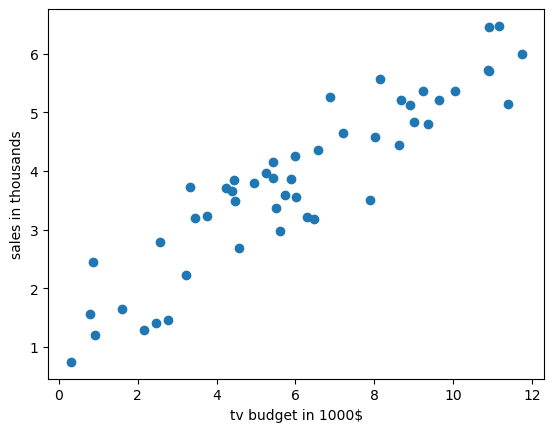

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot data
plt.scatter(x, y)
plt.xlabel("tv budget in 1000$")
plt.ylabel("sales in thousands")
plt.show()

It seems that an increase in the television budget creates a proportional increase in sales which is precisely what a line expresses geometrically. The idea of simple linear regressions is to quantify this **linear relationship** by fitting the equation of a line to the data points

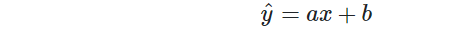

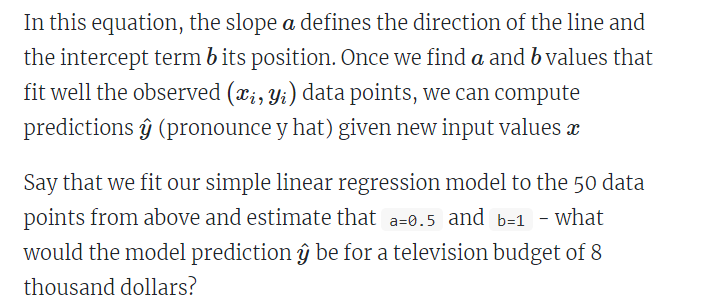



In [72]:
z = 0.5 * 8 + 1
z

5.0

### Polyfit function
Let’s see again how to fit this simple linear regression model with the polyfit() function

In [75]:
import numpy as np

# Fit a linear regression
coefs = np.polyfit(x, y, deg=1)
print("Coefficients:", coefs)

Coefficients: [0.42063597 1.27867727]


In [76]:
# Generate a hundred data points
x_values = np.linspace(x.min(), x.max(), num=100)

# Compute predictions
y_values = np.polyval(coefs, x_values)

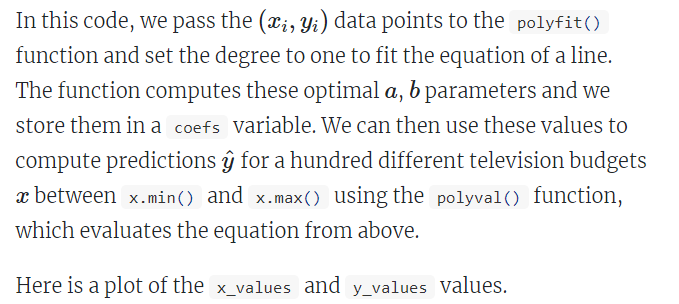

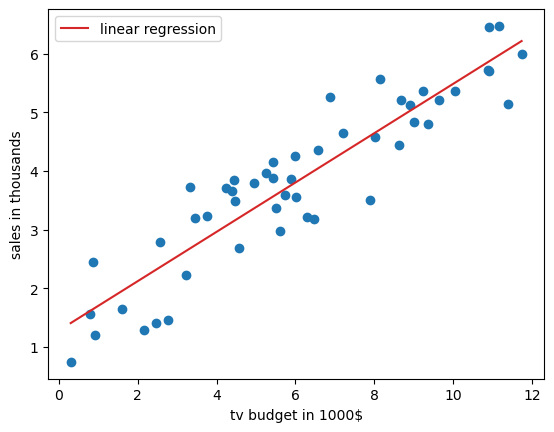

In [77]:
# Plot predictions
plt.scatter(x, y)
plt.plot(x_values, y_values, c="C3", label="linear regression")
plt.xlabel("tv budget in 1000$")
plt.ylabel("sales in thousands")
plt.legend()
plt.show()

### Optimal parameters
Let’s now see what the polyfit() function optimizes when it fits this equation of a line. The Numpy documentation page of the polyfit() function states that it optimizes the squared error

**Note**

“Returns a vector of coefficients p that minimizes the squared error.” -

`Numpy documentation`

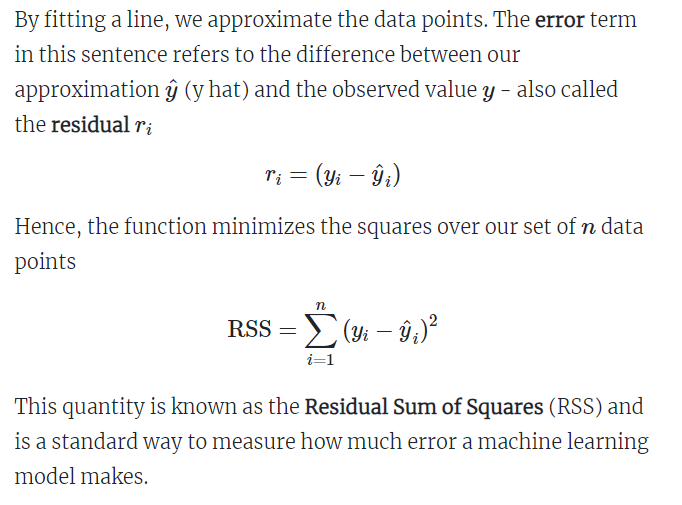

This quantity is known as the Residual Sum of Squares (RSS) and is a standard way to measure how much error a machine learning model makes.

Let’s say that we want to evaluate how well our simple linear regression model from above fits the data. To achieve this, we take the following three (x,y) data points: (2, 1) (6, 4) (10, 8) and pass them to our model that makes the following predictions ^y: 2 4, 6. What is the corresponding RSS error score?

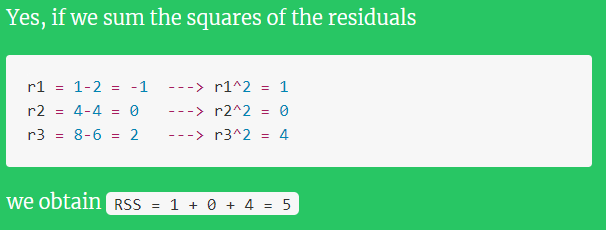

Measuring the amount of error that our models do is really at the hearth of machine learning approaches. In this course, we will see different metrics. But the RSS is one of the most used one when evaluating **regression models**.

You can take a look at this interactive visualization by Evan Sadler to see how the optimal line changes to minimize these squared residuals when adding new data points.

### Compute the RSS score
Let’s now see how to compute this RSS measure for the model and data from above using Python. First, we need to compute the predictions ^yi for each input value xi

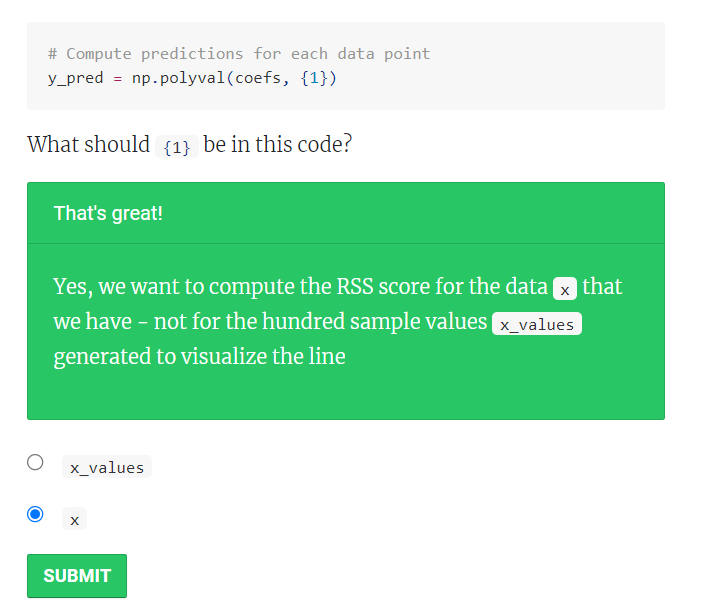

In [80]:
def RSS(y, y_pred):
    return np.sum(np.square(y - y_pred))
y_pred = np.polyval(coefs, x)
print("RSS value:", RSS(y, y_pred))

RSS value: 15.739481499345723


As we can see, our simple linear regression model has an RSS score around 15.7

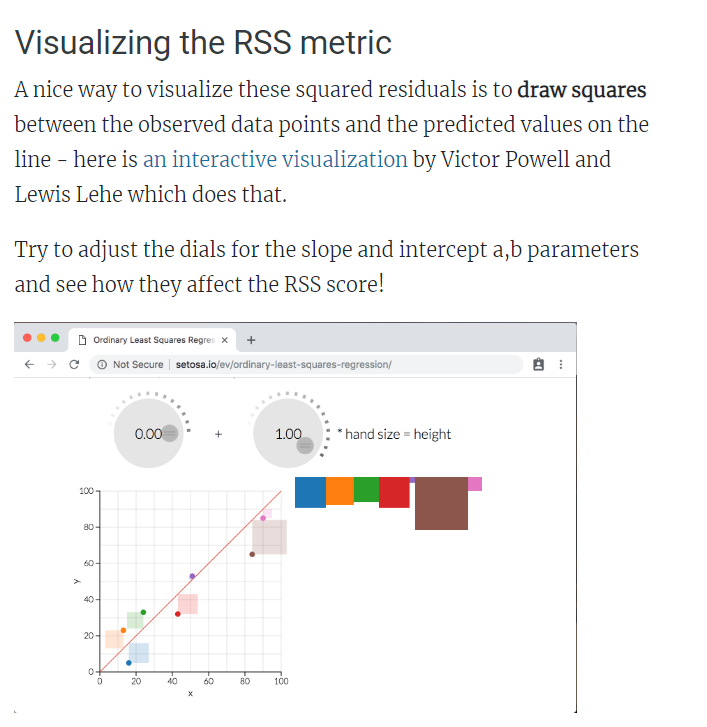

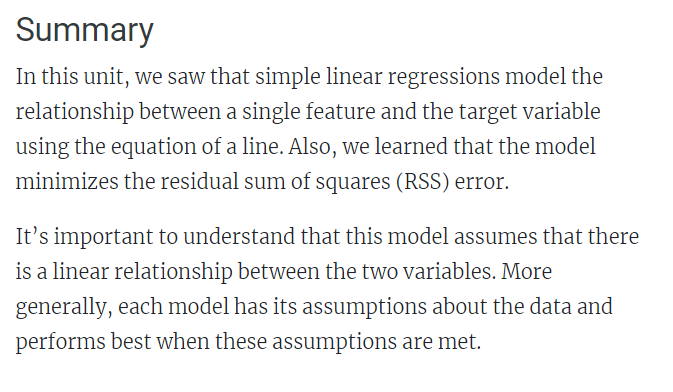

## Exercise - Polyfit on the bike sharing data set
### Task description

In this exercise, you will work on a subset of the bike sharing dataset from the UCI machine learning repository. The goal is to predict the daily number of users of a bike sharing service using temperature values.

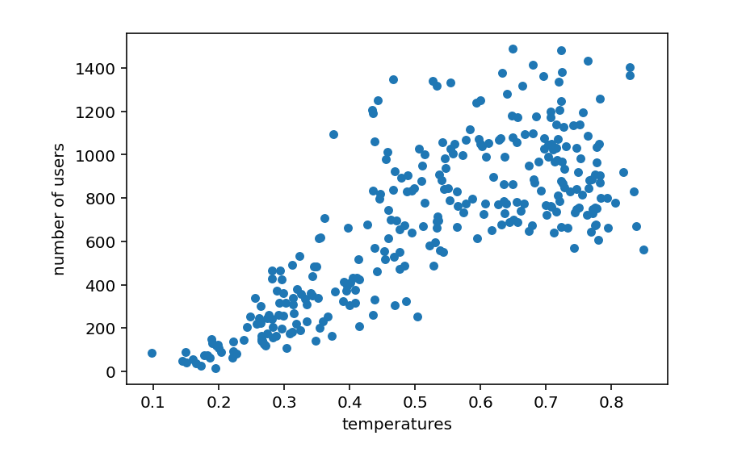

To achieve this, you will fit a polynomial to this set of data points using the Numpy polyfit() function. Also, you will evaluate the performance of your model using measures similar to the RSS one.

### Exercise
Download the exercise notebook from the resource section and complete the different tasks.

After completing the exercise, answer the following questions. Feel free to book a 1-1 video call with us if you have any question.

What did you observe?